In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BTCUSDT-bookTicker-2024-02-06.csv')

In [3]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,1707177600000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,1707235233178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,1707177600000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,1707235233178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,1707177600000,1707177600004


In [4]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], unit='ms')

In [5]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,1707235233182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,1707235233182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,1707177600004


In [6]:
df['event_time'] = pd.to_datetime(df['event_time'], unit='ms')

In [7]:
df.head()

,update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
0,3936653543857,42692.9,0.587,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
1,3939719410110,43233.4,0.846,43233.6,10.399,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
2,3936653543872,42692.9,0.584,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004
3,3939719410130,43233.4,0.846,43233.6,10.636,2024-02-06 16:00:33.178,2024-02-06 16:00:33.182
4,3936653543878,42692.9,0.562,42693.0,5.645,2024-02-06 00:00:00.000,2024-02-06 00:00:00.004


In [8]:
grouped = df.groupby([df['transaction_time'].dt.hour])

In [9]:
grouped['update_id'].count()

transaction_time
0      883747
1      955074
2     1165062
3      867975
4      849887
5      814240
6      829777
7      809152
8     1451969
9     1123615
10    1620430
11    1307003
12    1283219
13    1412374
14    1482887
15    1855624
16    1921017
17    1283150
18    1077940
19    1015262
20    1160909
21     894236
22     663772
23     811752
Name: update_id, dtype: int64

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

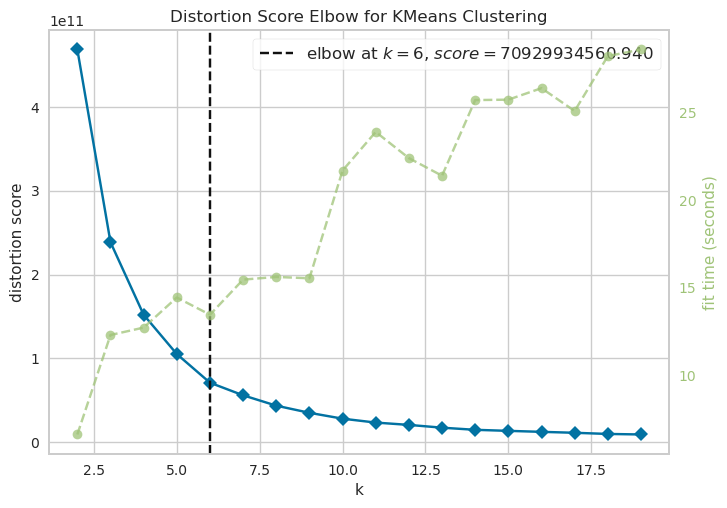

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
kmeans = KMeans(random_state=42, n_init="auto")
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df[['best_bid_price', 'best_bid_qty', 'best_ask_price', 'best_ask_qty']])
visualizer.show()

In [17]:
kmeans = KMeans(n_clusters=6).fit(df[['best_bid_price', 'best_bid_qty', 'best_ask_price', 'best_ask_qty']])

In [18]:
kmeans.cluster_centers_

array([[4.26558599e+04, 6.12448642e+00, 4.26559655e+04, 6.23542501e+00],
       [4.31630276e+04, 6.07064507e+00, 4.31631316e+04, 6.33479628e+00],
       [4.28963980e+04, 6.21898102e+00, 4.28965027e+04, 6.60542043e+00],
       [4.32771920e+04, 5.39529557e+00, 4.32773007e+04, 5.64757585e+00],
       [4.27773522e+04, 6.55372872e+00, 4.27774573e+04, 6.83020524e+00],
       [4.30352899e+04, 5.96851490e+00, 4.30353966e+04, 6.28720846e+00]])

In [ ]:
df['best_bid_total'] = df['best_bid_price'] * df['best_bid_qty']

df_group_by_timestamp = df.groupby('transaction_time').mean().reset_index()
plt.plot(df_group_by_timestamp['transaction_time'], df_group_by_timestamp['best_bid_total'])